### This script contains the following:

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Exploratory data visualizations and hypothesis

#### 4. Reshaping the variables into NumPy arrays

#### 5. Splitting data into training set and test set

#### 6. Linear regression on the data, test set scatterplot, and remarks

#### 7. Checking model performance with summary statistics, y-values comparison, and reflections

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import hypot

In [2]:
# Ensure charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project'

In [4]:
# Import rat data.

df_rats = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Cleaned_5.csv'))

In [5]:
# Import condominium rental income data.

df_condo = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Original Data', 'DOF_Condominium_Comparable_Rental_Income_in_NYC_20240223.csv'))

### 2. Data cleaning

#### Rat Data Set

In [6]:
# Inspect rats dataframe.

df_rats

,Unnamed: 0,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_year_flag,inspection_month
0,82,Initial,1,2.025130e+09,2,10452.0,40.834698,-73.927406,Bronx,2023-04-07 11:11:19,Rat Activity,"(40.83469838352, -73.927406205529)",4.0,8.0,193.0,Highbridge,2023,Present,4
1,145,Initial,1,2.024830e+09,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,Present,9
2,467,Initial,1,2.030610e+09,2,10457.0,40.850038,-73.894424,Bronx,2023-07-17 11:05:21,Passed,"(40.850037850563, -73.894424000437)",6.0,15.0,37504.0,Tremont,2023,Present,7
3,628,BAIT,10,2.028080e+09,2,10453.0,40.850368,-73.905267,Bronx,2023-12-27 11:17:00,Bait applied,"(40.850368435006, -73.90526741065)",5.0,14.0,23501.0,Mount Hope,2023,Present,12
4,720,Initial,1,1.020500e+09,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,Present,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390425,2478811,Initial,1,2.031980e+09,2,10468.0,40.860970,-73.903701,Bronx,2022-07-18 15:29:22,Rat Activity,"(40.860970037215, -73.903701320028)",7.0,14.0,253.0,University Heights (North)-Fordham,2022,Present,7
2390426,2478812,Initial,1,3.015950e+09,3,11206.0,40.694630,-73.935954,Brooklyn,2023-02-03 15:00:12,Rat Activity,"(40.69463026184, -73.935954461176)",3.0,36.0,287.0,Bedford-Stuyvesant (East),2023,Present,2
2390427,2478813,Initial,1,2.031880e+09,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,Present,5
2390428,2478814,Initial,1,4.012820e+09,4,11377.0,40.746886,-73.896421,Queens,2023-03-02 12:51:42,Passed,"(40.746886470496, -73.896421476592)",2.0,26.0,263.0,Woodside,2023,Present,3


In [7]:
df_rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390430 entries, 0 to 2390429
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   INSPECTION_TYPE       object 
 2   JOB_PROGRESS          int64  
 3   BBL                   float64
 4   BORO_CODE             int64  
 5   ZIP_CODE              float64
 6   LATITUDE              float64
 7   LONGITUDE             float64
 8   BOROUGH               object 
 9   INSPECTION_DATE       object 
 10  RESULT                object 
 11  LOCATION              object 
 12  COMMUNITY BOARD       float64
 13  COUNCIL DISTRICT      float64
 14  CENSUS TRACT          float64
 15  NEIGHBORHOOD          object 
 16  inspection_year       int64  
 17  inspection_year_flag  object 
 18  inspection_month      int64  
dtypes: float64(7), int64(5), object(7)
memory usage: 346.5+ MB


In [8]:
# Remove unnecessary columns.

df_rats = df_rats.drop(columns=['Unnamed: 0', 'inspection_year_flag'])

In [9]:
# Check data types.

df_rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390430 entries, 0 to 2390429
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   INSPECTION_TYPE   object 
 1   JOB_PROGRESS      int64  
 2   BBL               float64
 3   BORO_CODE         int64  
 4   ZIP_CODE          float64
 5   LATITUDE          float64
 6   LONGITUDE         float64
 7   BOROUGH           object 
 8   INSPECTION_DATE   object 
 9   RESULT            object 
 10  LOCATION          object 
 11  COMMUNITY BOARD   float64
 12  COUNCIL DISTRICT  float64
 13  CENSUS TRACT      float64
 14  NEIGHBORHOOD      object 
 15  inspection_year   int64  
 16  inspection_month  int64  
dtypes: float64(7), int64(4), object(6)
memory usage: 310.0+ MB


In [10]:
# Check for mixed-type data.

for col in df_rats.columns.tolist():
      weird = (df_rats[[col]].map(type) != df_rats[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_rats[weird]) > 0:
        print (col) # No mixed-type data found.

In [11]:
# Check duplicates.

df_rats_dups = df_rats[df_rats.duplicated()]

In [12]:
df_rats_dups.shape

(181, 17)

In [13]:
df_rats_dups # The duplicates found don't appear to be actual duplicates, so they will be left untouched.

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month
78214,BAIT,1,2.025040e+09,2,10452.0,40.832412,-73.927058,Bronx,2023-04-04 10:32:00,Bait applied,"(40.832411795248, -73.927058184471)",4.0,16.0,189.0,Highbridge,2023,4
120896,Initial,1,3.048000e+09,3,11203.0,40.661530,-73.939122,Brooklyn,2011-04-07 13:50:01,Rat Activity,"(40.661529985943, -73.939122167302)",9.0,41.0,87401.0,Prospect Lefferts Gardens-Wingate,2011,4
142109,BAIT,2,4.004711e+09,4,11101.0,40.756971,-73.939583,Queens,2011-09-03 14:30:00,Bait applied,"(40.756971376333, -73.939583255991)",1.0,26.0,85.0,Queensbridge-Ravenswood-Dutch Kills,2011,9
187761,Compliance,2,3.017540e+09,3,11206.0,40.695329,-73.949484,Brooklyn,2024-01-22 11:10:00,Passed,"(40.695328704554, -73.949484272976)",3.0,36.0,253.0,Bedford-Stuyvesant (West),2024,1
195646,BAIT,2,1.018900e+09,1,10025.0,40.800474,-73.969887,Manhattan,2022-08-05 11:55:00,Bait applied,"(40.800473955192, -73.969887393421)",7.0,6.0,191.0,Upper West Side-Manhattan Valley,2022,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360060,BAIT,1,2.033350e+09,2,10467.0,40.874919,-73.880231,Bronx,2010-03-24 15:19:27,Bait applied,"(40.874918652172, -73.880231372395)",7.0,11.0,419.0,Norwood,2010,3
2360294,BAIT,4,1.001220e+09,1,10007.0,40.713807,-74.005570,Manhattan,2015-04-25 09:40:45,Bait applied,"(40.713806515614, -74.005569530537)",1.0,1.0,31.0,Tribeca-Civic Center,2015,4
2366346,Initial,1,5.026370e+09,5,10314.0,40.589954,-74.191161,Staten Island,2010-12-07 16:15:17,Failed for Other R,"(40.589953543871, -74.191161119996)",2.0,50.0,29102.0,New Springville-Willowbrook-Bulls Head-Travis,2010,12
2374990,BAIT,4,2.025060e+09,2,10452.0,40.838022,-73.922188,Bronx,2023-01-09 10:46:00,Bait applied,"(40.838021590755, -73.922187604932)",4.0,16.0,211.0,Highbridge,2023,1


In [14]:
# Check for missing data.

df_rats.isnull().sum() # No missing data found.

INSPECTION_TYPE     0
JOB_PROGRESS        0
BBL                 0
BORO_CODE           0
ZIP_CODE            0
LATITUDE            0
LONGITUDE           0
BOROUGH             0
INSPECTION_DATE     0
RESULT              0
LOCATION            0
COMMUNITY BOARD     0
COUNCIL DISTRICT    0
CENSUS TRACT        0
NEIGHBORHOOD        0
inspection_year     0
inspection_month    0
dtype: int64

In [15]:
# Value counts for BOROUGH.

df_rats['BOROUGH'].value_counts(dropna=False)

BOROUGH
Manhattan        770715
Bronx            694553
Brooklyn         664892
Queens           206943
Staten Island     53327
Name: count, dtype: int64

In [16]:
# Convert BOROUGH value_counts to output to dataframe.

rats_boro_count = df_rats['BOROUGH'].value_counts().reset_index().rename(columns={"index": "value", 0: "borough count"})
rats_boro_count

,BOROUGH,count
0,Manhattan,770715
1,Bronx,694553
2,Brooklyn,664892
3,Queens,206943
4,Staten Island,53327


In [17]:
# Export rats_boro_count to csv.

rats_boro_count.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'rats_boro_count.csv'))

In [18]:
# Value counts for INSPECTION_TYPE.

df_rats['INSPECTION_TYPE'].value_counts(dropna=False)

INSPECTION_TYPE
Initial       1694848
Compliance     361971
BAIT           333611
Name: count, dtype: int64

In [19]:
# Convert INSPECTION_TYPE value_counts to output to dataframe.

rats_inspection_count = df_rats['INSPECTION_TYPE'].value_counts().reset_index().rename(columns={"index": "value", 0: "inspection type count"})
rats_inspection_count

,INSPECTION_TYPE,count
0,Initial,1694848
1,Compliance,361971
2,BAIT,333611


In [20]:
# Export rats_inspection_count to csv.

rats_inspection_count.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'rats_inspection_count.csv'))

In [21]:
# Value counts for RESULT.

df_rats['RESULT'].value_counts(dropna=False)

RESULT
Passed                1461844
Rat Activity           382756
Bait applied           333430
Failed for Other R     212219
Monitoring visit          181
Name: count, dtype: int64

In [22]:
# Convert RESULT value_counts to output to dataframe.

rats_result_count = df_rats['RESULT'].value_counts().reset_index().rename(columns={"index": "value", 0: "result count"})
rats_result_count

,RESULT,count
0,Passed,1461844
1,Rat Activity,382756
2,Bait applied,333430
3,Failed for Other R,212219
4,Monitoring visit,181


In [23]:
# Export rats_result_count to csv.

rats_result_count.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'rats_result_count.csv'))

Times Square is one of the most iconic and populous locations in NYC. I'm curious if and how the number of follow-up rat inspections per site correlates to the site's distance from Times Square based on [Times Square's coordinates](https://www.latlong.net/place/times-square-nyc-usa-7560.html).

In [24]:
# Calculate distance of each location from Times Square coordinates (40.758896, -73.985130).

def distance(x,y):
    tsLat = 40.758896
    tsLong = -73.985130
    return hypot(tsLat - x, tsLong - y)

result = []

for index, row in df_rats.iterrows():
    result.append(distance(row["LATITUDE"], row["LONGITUDE"]))

df_rats['distance_times_square'] = result

In [25]:
# Check output.

df_rats

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month,distance_times_square
0,Initial,1,2.025130e+09,2,10452.0,40.834698,-73.927406,Bronx,2023-04-07 11:11:19,Rat Activity,"(40.83469838352, -73.927406205529)",4.0,8.0,193.0,Highbridge,2023,4,0.095279
1,Initial,1,2.024830e+09,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9,0.090610
2,Initial,1,2.030610e+09,2,10457.0,40.850038,-73.894424,Bronx,2023-07-17 11:05:21,Passed,"(40.850037850563, -73.894424000437)",6.0,15.0,37504.0,Tremont,2023,7,0.128586
3,BAIT,10,2.028080e+09,2,10453.0,40.850368,-73.905267,Bronx,2023-12-27 11:17:00,Bait applied,"(40.850368435006, -73.90526741065)",5.0,14.0,23501.0,Mount Hope,2023,12,0.121430
4,Initial,1,1.020500e+09,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9,0.074184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390425,Initial,1,2.031980e+09,2,10468.0,40.860970,-73.903701,Bronx,2022-07-18 15:29:22,Rat Activity,"(40.860970037215, -73.903701320028)",7.0,14.0,253.0,University Heights (North)-Fordham,2022,7,0.130575
2390426,Initial,1,3.015950e+09,3,11206.0,40.694630,-73.935954,Brooklyn,2023-02-03 15:00:12,Rat Activity,"(40.69463026184, -73.935954461176)",3.0,36.0,287.0,Bedford-Stuyvesant (East),2023,2,0.080922
2390427,Initial,1,2.031880e+09,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,5,0.131144
2390428,Initial,1,4.012820e+09,4,11377.0,40.746886,-73.896421,Queens,2023-03-02 12:51:42,Passed,"(40.746886470496, -73.896421476592)",2.0,26.0,263.0,Woodside,2023,3,0.089518


In [26]:
# Convert BBL data type to string.

df_rats['BBL'] = df_rats['BBL'].astype('str')

In [27]:
# Check data type change.

df_rats['BBL'].dtype

dtype('O')

In [28]:
df_rats

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month,distance_times_square
0,Initial,1,2025130009.0,2,10452.0,40.834698,-73.927406,Bronx,2023-04-07 11:11:19,Rat Activity,"(40.83469838352, -73.927406205529)",4.0,8.0,193.0,Highbridge,2023,4,0.095279
1,Initial,1,2024830053.0,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9,0.090610
2,Initial,1,2030610080.0,2,10457.0,40.850038,-73.894424,Bronx,2023-07-17 11:05:21,Passed,"(40.850037850563, -73.894424000437)",6.0,15.0,37504.0,Tremont,2023,7,0.128586
3,BAIT,10,2028080012.0,2,10453.0,40.850368,-73.905267,Bronx,2023-12-27 11:17:00,Bait applied,"(40.850368435006, -73.90526741065)",5.0,14.0,23501.0,Mount Hope,2023,12,0.121430
4,Initial,1,1020500101.0,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9,0.074184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390425,Initial,1,2031980027.0,2,10468.0,40.860970,-73.903701,Bronx,2022-07-18 15:29:22,Rat Activity,"(40.860970037215, -73.903701320028)",7.0,14.0,253.0,University Heights (North)-Fordham,2022,7,0.130575
2390426,Initial,1,3015950024.0,3,11206.0,40.694630,-73.935954,Brooklyn,2023-02-03 15:00:12,Rat Activity,"(40.69463026184, -73.935954461176)",3.0,36.0,287.0,Bedford-Stuyvesant (East),2023,2,0.080922
2390427,Initial,1,2031880092.0,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,5,0.131144
2390428,Initial,1,4012820003.0,4,11377.0,40.746886,-73.896421,Queens,2023-03-02 12:51:42,Passed,"(40.746886470496, -73.896421476592)",2.0,26.0,263.0,Woodside,2023,3,0.089518


In [29]:
# Check BBL value counts.

df_rats['BBL'].value_counts(dropna = False)

BBL
0.0             630
1019090033.0    453
1003890036.0    317
1003020001.0    298
1001650001.0    293
               ... 
4030910085.0      1
4006920022.0      1
5033470057.0      1
2042720029.0      1
2053830057.0      1
Name: count, Length: 310339, dtype: int64

In [30]:
# Replace (0.0, 0.0) values with NaN in BBL column.

df_rats.replace('0.0', np.nan, inplace=True)

In [31]:
# Recheck BBL value counts.

df_rats['BBL'].value_counts(dropna = False)

BBL
NaN             630
1019090033.0    453
1003890036.0    317
1003020001.0    298
1001650001.0    293
               ... 
4030910085.0      1
4006920022.0      1
5033470057.0      1
2042720029.0      1
2053830057.0      1
Name: count, Length: 310339, dtype: int64

In [32]:
# Create dataframe with second batch of missing BBL values removed.

df_rats_1 = df_rats[df_rats['BBL'].isnull() == False]

In [33]:
# Check output.

df_rats_1['BBL'].value_counts(dropna = False)

BBL
1019090033.0    453
1003890036.0    317
1003020001.0    298
1001650001.0    293
2024310026.0    281
               ... 
4102580219.0      1
2046820044.0      1
3055010022.0      1
4121920075.0      1
2053830057.0      1
Name: count, Length: 310338, dtype: int64

In [34]:
# Change BBL data type to string.

df_rats_1['BBL'] = df_rats_1['BBL'].astype('str')

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\1776494780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rats_1['BBL'] = df_rats_1['BBL'].astype('str')


In [35]:
# Check data type change.

df_rats_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2389800 entries, 0 to 2390429
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   INSPECTION_TYPE        object 
 1   JOB_PROGRESS           int64  
 2   BBL                    object 
 3   BORO_CODE              int64  
 4   ZIP_CODE               float64
 5   LATITUDE               float64
 6   LONGITUDE              float64
 7   BOROUGH                object 
 8   INSPECTION_DATE        object 
 9   RESULT                 object 
 10  LOCATION               object 
 11  COMMUNITY BOARD        float64
 12  COUNCIL DISTRICT       float64
 13  CENSUS TRACT           float64
 14  NEIGHBORHOOD           object 
 15  inspection_year        int64  
 16  inspection_month       int64  
 17  distance_times_square  float64
dtypes: float64(7), int64(4), object(7)
memory usage: 346.4+ MB


In [36]:
df_rats_1

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month,distance_times_square
0,Initial,1,2025130009.0,2,10452.0,40.834698,-73.927406,Bronx,2023-04-07 11:11:19,Rat Activity,"(40.83469838352, -73.927406205529)",4.0,8.0,193.0,Highbridge,2023,4,0.095279
1,Initial,1,2024830053.0,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9,0.090610
2,Initial,1,2030610080.0,2,10457.0,40.850038,-73.894424,Bronx,2023-07-17 11:05:21,Passed,"(40.850037850563, -73.894424000437)",6.0,15.0,37504.0,Tremont,2023,7,0.128586
3,BAIT,10,2028080012.0,2,10453.0,40.850368,-73.905267,Bronx,2023-12-27 11:17:00,Bait applied,"(40.850368435006, -73.90526741065)",5.0,14.0,23501.0,Mount Hope,2023,12,0.121430
4,Initial,1,1020500101.0,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9,0.074184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390425,Initial,1,2031980027.0,2,10468.0,40.860970,-73.903701,Bronx,2022-07-18 15:29:22,Rat Activity,"(40.860970037215, -73.903701320028)",7.0,14.0,253.0,University Heights (North)-Fordham,2022,7,0.130575
2390426,Initial,1,3015950024.0,3,11206.0,40.694630,-73.935954,Brooklyn,2023-02-03 15:00:12,Rat Activity,"(40.69463026184, -73.935954461176)",3.0,36.0,287.0,Bedford-Stuyvesant (East),2023,2,0.080922
2390427,Initial,1,2031880092.0,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,5,0.131144
2390428,Initial,1,4012820003.0,4,11377.0,40.746886,-73.896421,Queens,2023-03-02 12:51:42,Passed,"(40.746886470496, -73.896421476592)",2.0,26.0,263.0,Woodside,2023,3,0.089518


In [37]:
# Strip ".0" from BBL values.

df_rats_1['BBL'] = df_rats_1['BBL'].astype(str).str.rstrip('.0')

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\2756118354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rats_1['BBL'] = df_rats_1['BBL'].astype(str).str.rstrip('.0')


In [38]:
# Check output.

df_rats_1

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month,distance_times_square
0,Initial,1,2025130009,2,10452.0,40.834698,-73.927406,Bronx,2023-04-07 11:11:19,Rat Activity,"(40.83469838352, -73.927406205529)",4.0,8.0,193.0,Highbridge,2023,4,0.095279
1,Initial,1,2024830053,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9,0.090610
2,Initial,1,203061008,2,10457.0,40.850038,-73.894424,Bronx,2023-07-17 11:05:21,Passed,"(40.850037850563, -73.894424000437)",6.0,15.0,37504.0,Tremont,2023,7,0.128586
3,BAIT,10,2028080012,2,10453.0,40.850368,-73.905267,Bronx,2023-12-27 11:17:00,Bait applied,"(40.850368435006, -73.90526741065)",5.0,14.0,23501.0,Mount Hope,2023,12,0.121430
4,Initial,1,1020500101,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9,0.074184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390425,Initial,1,2031980027,2,10468.0,40.860970,-73.903701,Bronx,2022-07-18 15:29:22,Rat Activity,"(40.860970037215, -73.903701320028)",7.0,14.0,253.0,University Heights (North)-Fordham,2022,7,0.130575
2390426,Initial,1,3015950024,3,11206.0,40.694630,-73.935954,Brooklyn,2023-02-03 15:00:12,Rat Activity,"(40.69463026184, -73.935954461176)",3.0,36.0,287.0,Bedford-Stuyvesant (East),2023,2,0.080922
2390427,Initial,1,2031880092,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,5,0.131144
2390428,Initial,1,4012820003,4,11377.0,40.746886,-73.896421,Queens,2023-03-02 12:51:42,Passed,"(40.746886470496, -73.896421476592)",2.0,26.0,263.0,Woodside,2023,3,0.089518


#### Condominium Income Data

In the interest of exploring more quantitative variables and their potential correlations to NYC rat inspections, I've imported the NYC Department of Finance (DOF) condominium income dataset that includes location-specific condominium values and comparable properties. The open-source dataset and its dictionary can be found [here](https://data.cityofnewyork.us/City-Government/DOF-Condominium-Comparable-Rental-Income-in-NYC/9ck6-2jew/about_data).

In [39]:
# Explore condominium rental income data set.

df_condo

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,0.35,2019
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,0.63,2019
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,0.22,2019
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,0.19,2019
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,0.22,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31570,5-02829-7501,0100-R1,31 HYLAN BOULEVARD,ROSEBANK,R4 -ELEVATOR,52,1988.0,63601,1425934,22.42,...,297600.0,6743616.0,22.66,3217056.0,10.81,3526560.0,26655000.0,89.57,0.93,2023
31571,5-02862-7501,0086-R1,50 BELAIR ROAD,ROSEBANK,R2 -WALK-UP,48,1985.0,51425,1097410,21.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
31572,5-03019-7501,0117-R1,81 NARROWS ROAD NORTH,ROSEBANK,R2 -WALK-UP,40,1946.0,38700,846369,21.87,...,8950.0,210862.0,23.56,74106.0,8.28,136756.0,1110000.0,124.02,0.17,2023
31573,5-03318-7501,0097-R1,163 CROMWELL AVENUE,DONGAN HILLS,R2 -WALK-UP,48,1973.0,38424,745810,19.41,...,10626.0,206251.0,19.41,99884.0,9.40,106366.0,813000.0,76.51,0.21,2023


In [40]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31575 entries, 0 to 31574
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Boro-Block-Lot                  31575 non-null  object 
 1   Condo Section                   31575 non-null  object 
 2   Address                         31575 non-null  object 
 3   Neighborhood                    31573 non-null  object 
 4   Building Classification         31575 non-null  object 
 5   Total Units                     31575 non-null  int64  
 6   Year Built                      31500 non-null  float64
 7   Gross SqFt                      31575 non-null  int64  
 8   Estimated Gross Income          31575 non-null  int64  
 9   Gross Income per SqFt           31575 non-null  float64
 10  Estimated Expense               31574 non-null  float64
 11  Expense per SqFt                31574 non-null  float64
 12  Net Operating Income            

In [41]:
# Remove unnecessary columns.

df_condo = df_condo.drop(columns = ['Condo Section', 'Building Classification', 'Boro-Block-Lot 1','Address 1', 'Neighborhood 1', 'Building Classification 1', 'Total Units 1', 'Year Built 1', 'Gross SqFt 1', 'Estimated Gross Income 1', 'Gross Income per SqFt 1', 'Estimated Expense 1', 'Expense per SqFt 1', 'Net Operating Income 1', 'Full Market Value 1', 'Market Value per SqFt 1', 'Distance from Condo in miles', 'Boro-Block-Lot 2','Address 2', 'Neighborhood 2', 'Building Classification 2', 'Total Units 2', 'Year Built 2', 'Gross SqFt 2', 'Estimated Gross Income 2', 'Gross Income per SqFt 2', 'Estimated Expense 2', 'Expense per SqFt 2', 'Net Operating Income 2', 'Full Market Value 2', 'Market Value per SqFt 2', 'Distance from Condo in miles 1', 'Boro-Block-Lot 3','Address 3', 'Neighborhood 3', 'Building Classification 3', 'Total Units 3', 'Year Built 3', 'Gross SqFt 3', 'Estimated Gross Income 3', 'Gross Income per SqFt 3', 'Estimated Expense 3', 'Expense per SqFt 3', 'Net Operating Income 3', 'Full Market Value 3', 'Market Value per SqFt 3', 'Distance from Condo in miles 2'])
df_condo

,Boro-Block-Lot,Address,Neighborhood,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year
0,1-00576-7501,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,70,1966.0,82017,4452703,54.29,1729739.0,21.09,2722964,22115002.0,269.64,2019
1,1-01271-7501,1360 6 AVENUE,MIDTOWN WEST,183,1963.0,141738,7113830,50.19,2361355.0,16.66,4752475,38596999.0,272.31,2019
2,1-00894-7501,77 PARK AVENUE,MURRAY HILL,109,1924.0,158571,7329152,46.22,2854278.0,18.00,4474874,36343010.0,229.19,2019
3,1-00631-7501,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,20,1910.0,53943,2132906,39.54,666196.0,12.35,1466710,11912000.0,220.83,2019
4,1-00868-7501,35 EAST 38 STREET,MURRAY HILL,113,1961.0,88230,4288860,48.61,1055231.0,11.96,3233629,26261996.0,297.65,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31570,5-02829-7501,31 HYLAN BOULEVARD,ROSEBANK,52,1988.0,63601,1425934,22.42,751764.0,11.82,674171,5267000.0,82.81,2023
31571,5-02862-7501,50 BELAIR ROAD,ROSEBANK,48,1985.0,51425,1097410,21.34,552819.0,10.75,544591,4225000.0,82.16,2023
31572,5-03019-7501,81 NARROWS ROAD NORTH,ROSEBANK,40,1946.0,38700,846369,21.87,524772.0,13.56,321597,2505000.0,64.73,2023
31573,5-03318-7501,163 CROMWELL AVENUE,DONGAN HILLS,48,1973.0,38424,745810,19.41,361186.0,9.40,384624,2938000.0,76.46,2023


In [42]:
# Check for missing data.

df_condo.isnull().sum()

Boro-Block-Lot             0
Address                    0
Neighborhood               2
Total Units                0
Year Built                75
Gross SqFt                 0
Estimated Gross Income     0
Gross Income per SqFt      0
Estimated Expense          1
Expense per SqFt           1
Net Operating Income       0
Full Market Value          2
Market Value per SqFt      3
Report Year                0
dtype: int64

In [43]:
# Drop remaining missing values.

df_condo.dropna(inplace = True)

In [44]:
# Re-check missing values.

df_condo.isnull().sum()

Boro-Block-Lot            0
Address                   0
Neighborhood              0
Total Units               0
Year Built                0
Gross SqFt                0
Estimated Gross Income    0
Gross Income per SqFt     0
Estimated Expense         0
Expense per SqFt          0
Net Operating Income      0
Full Market Value         0
Market Value per SqFt     0
Report Year               0
dtype: int64

In [45]:
# Check output.

df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31494 entries, 0 to 31574
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Boro-Block-Lot          31494 non-null  object 
 1   Address                 31494 non-null  object 
 2   Neighborhood            31494 non-null  object 
 3   Total Units             31494 non-null  int64  
 4   Year Built              31494 non-null  float64
 5   Gross SqFt              31494 non-null  int64  
 6   Estimated Gross Income  31494 non-null  int64  
 7   Gross Income per SqFt   31494 non-null  float64
 8   Estimated Expense       31494 non-null  float64
 9   Expense per SqFt        31494 non-null  float64
 10  Net Operating Income    31494 non-null  int64  
 11  Full Market Value       31494 non-null  float64
 12  Market Value per SqFt   31494 non-null  float64
 13  Report Year             31494 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory u

In [46]:
# Export cleaned data to csv.

df_condo.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Condo_Data_Cleaned_1.csv'))

In [47]:
# Check duplicates.

df_condo_dups = df_condo[df_condo.duplicated()]

In [48]:
df_condo_dups.shape

(6, 14)

In [49]:
df_condo_dups # The duplicates appear to be the same buildings but with different years reported, so I'll leave them untouched.

,Boro-Block-Lot,Address,Neighborhood,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year
4763,4-03097-7501,94-10 64 ROAD,REGO PARK,6,1966.0,5083,118891,23.39,54591.0,10.74,64300,507000.0,99.74,2020
6971,2-02724-7502,1000 FOX ST,MORRISANIA/LONGWOOD,60,2017.0,63497,1212158,19.09,640050.0,10.08,572108,4412000.0,69.48,2021
17061,4-03097-7501,94-10 64 ROAD,REGO PARK,6,1966.0,5083,85771,16.87,40060.0,7.88,45711,320000.0,62.95,2014
19425,4-03097-7501,94-10 64 ROAD,REGO PARK,6,1966.0,5083,98661,19.41,38021.0,7.48,60640,450001.0,88.53,2015
28025,4-03097-7501,94-10 64 ROAD,REGO PARK,6,1966.0,5083,117519,23.12,49610.0,9.76,67909,546000.0,107.42,2018
29803,2-02724-7502,1000 FOX ST,MORRISANIA/LONGWOOD,60,2017.0,63497,998173,15.72,384157.0,6.05,614016,4480000.0,70.55,2023


In [102]:
# Check for mixed-type data.

for col in df_condo.columns.tolist():
      weird = (df_condo[[col]].map(type) != df_condo[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_condo[weird]) > 0:
        print (col) # No mixed-type data found.

In [53]:
# Rename 'Boro-Block-Lot' column to 'BBL' to match df_rats.

df_condo.rename(columns = {'Boro-Block-Lot':'BBL'}, inplace = True)

In [54]:
# Check column rename.

df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31494 entries, 0 to 31574
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BBL                     31494 non-null  object 
 1   Address                 31494 non-null  object 
 2   Neighborhood            31494 non-null  object 
 3   Total Units             31494 non-null  int64  
 4   Year Built              31494 non-null  float64
 5   Gross SqFt              31494 non-null  int64  
 6   Estimated Gross Income  31494 non-null  int64  
 7   Gross Income per SqFt   31494 non-null  float64
 8   Estimated Expense       31494 non-null  float64
 9   Expense per SqFt        31494 non-null  float64
 10  Net Operating Income    31494 non-null  int64  
 11  Full Market Value       31494 non-null  float64
 12  Market Value per SqFt   31494 non-null  float64
 13  Report Year             31494 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory u

In [84]:
# Create for-loop to remove hyphens from variable 'BBL'.

result = []

for value in df_condo['BBL']:
    result.append(value.replace('-', ''))

In [85]:
result

['1005767501',
 '1012717501',
 '1008947501',
 '1006317501',
 '1008687501',
 '1005717501',
 '1015057501',
 '1012457501',
 '1013107501',
 '1011417501',
 '1015777501',
 '1012127501',
 '1013707501',
 '1005577501',
 '1013897501',
 '1013897501',
 '1010487501',
 '1013437501',
 '1013427501',
 '1011137501',
 '1005207501',
 '1007937501',
 '1012357501',
 '1012467501',
 '1006047501',
 '1001817501',
 '1011427501',
 '1009117501',
 '1005737502',
 '1013907502',
 '1015057502',
 '1013427502',
 '1006247502',
 '1011177501',
 '1008197501',
 '1013777502',
 '1015697501',
 '1009117502',
 '1001937501',
 '1005007501',
 '1007467502',
 '1011167501',
 '1011207501',
 '1014647501',
 '1005027501',
 '1009447501',
 '1014147501',
 '1007427501',
 '1012947501',
 '1013447501',
 '1009037502',
 '1005377501',
 '1007927501',
 '1006357501',
 '1011507502',
 '1011407501',
 '1014077501',
 '1002847501',
 '1004927501',
 '1014437501',
 '1013417501',
 '1007987502',
 '1013507501',
 '1011247501',
 '1011147501',
 '1013237501',
 '30088675

In [86]:
df_condo['BBL'] = result

In [87]:
df_condo

,BBL,Address,Neighborhood,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year
0,1005767501,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,70,1966.0,82017,4452703,54.29,1729739.0,21.09,2722964,22115002.0,269.64,2019
1,1012717501,1360 6 AVENUE,MIDTOWN WEST,183,1963.0,141738,7113830,50.19,2361355.0,16.66,4752475,38596999.0,272.31,2019
2,1008947501,77 PARK AVENUE,MURRAY HILL,109,1924.0,158571,7329152,46.22,2854278.0,18.00,4474874,36343010.0,229.19,2019
3,1006317501,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,20,1910.0,53943,2132906,39.54,666196.0,12.35,1466710,11912000.0,220.83,2019
4,1008687501,35 EAST 38 STREET,MURRAY HILL,113,1961.0,88230,4288860,48.61,1055231.0,11.96,3233629,26261996.0,297.65,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31570,5028297501,31 HYLAN BOULEVARD,ROSEBANK,52,1988.0,63601,1425934,22.42,751764.0,11.82,674171,5267000.0,82.81,2023
31571,5028627501,50 BELAIR ROAD,ROSEBANK,48,1985.0,51425,1097410,21.34,552819.0,10.75,544591,4225000.0,82.16,2023
31572,5030197501,81 NARROWS ROAD NORTH,ROSEBANK,40,1946.0,38700,846369,21.87,524772.0,13.56,321597,2505000.0,64.73,2023
31573,5033187501,163 CROMWELL AVENUE,DONGAN HILLS,48,1973.0,38424,745810,19.41,361186.0,9.40,384624,2938000.0,76.46,2023


In [52]:
# Check Boro-Block-Lot data type.

df_condo['Boro-Block-Lot'].dtype

dtype('O')

In [90]:
# Rename df_rats_1 column "inspection_year" to "year."

df_rats_1.rename(columns = {'inspection_year':'year'}, inplace = True)

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\3933418969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rats_1.rename(columns = {'inspection_year':'year'}, inplace = True)


In [91]:
# Check column rename.

df_rats_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2389800 entries, 0 to 2390429
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   INSPECTION_TYPE        object 
 1   JOB_PROGRESS           int64  
 2   BBL                    object 
 3   BORO_CODE              int64  
 4   ZIP_CODE               float64
 5   LATITUDE               float64
 6   LONGITUDE              float64
 7   BOROUGH                object 
 8   INSPECTION_DATE        object 
 9   RESULT                 object 
 10  LOCATION               object 
 11  COMMUNITY BOARD        float64
 12  COUNCIL DISTRICT       float64
 13  CENSUS TRACT           float64
 14  NEIGHBORHOOD           object 
 15  year                   int64  
 16  inspection_month       int64  
 17  distance_times_square  float64
dtypes: float64(7), int64(4), object(7)
memory usage: 346.4+ MB


In [92]:
# Rename df_condo column "Report Year" to "year" to match df_rats_1.

df_condo.rename(columns = {'Report Year':'year'}, inplace = True)

In [93]:
# Merge df_rats with df_condo on BBL.

df_merged = df_rats_1.merge(df_condo, on = ['BBL', 'year'], indicator = True)

In [94]:
df_merged

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge
0,Initial,1,1014877502,1,10021.0,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,1986.0,317169,17939079,56.56,6727154.0,21.21,11211924,89660000.0,282.69,both
1,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,2007.0,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both
2,Initial,1,3037717501,3,11207.0,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,2007.0,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both
3,Compliance,2,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,2007.0,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both
4,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,2007.0,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,Initial,1,1013437501,1,10022.0,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,1931.0,79062,3401247,43.02,1116355.0,14.12,2284892,18284000.0,231.26,both
21502,Initial,1,1016237501,1,10035.0,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,2003.0,109646,2470324,22.53,1111810.0,10.14,1358514,10756000.0,98.10,both
21503,Initial,1,3000417502,3,11201.0,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,1951.0,37048,1336321,36.07,467546.0,12.62,868775,6990997.0,188.70,both
21504,Initial,1,1004257501,1,10002.0,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,1900.0,26783,967134,36.11,271044.0,10.12,696090,5255000.0,196.21,both


In [95]:
# Export df_merged to csv.

df_merged.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'rats_condo_merged_1.csv'))

In [96]:
# Strip ".0" from Year Built values.

df_merged['Year Built'] = df_merged['Year Built'].astype(str).str.rstrip('.0')

In [114]:
df_merged

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,Initial,1,1014877502,1,10021.0,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,317169,17939079,56.56,6727154.0,21.21,11211924,89660000.0,282.69,both,Yes
1,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
2,Initial,1,3037717501,3,11207.0,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
3,Compliance,2,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
4,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,Initial,1,1013437501,1,10022.0,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,79062,3401247,43.02,1116355.0,14.12,2284892,18284000.0,231.26,both,Yes
21502,Initial,1,1016237501,1,10035.0,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,109646,2470324,22.53,1111810.0,10.14,1358514,10756000.0,98.10,both,Yes
21503,Initial,1,3000417502,3,11201.0,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,37048,1336321,36.07,467546.0,12.62,868775,6990997.0,188.70,both,Yes
21504,Initial,1,1004257501,1,10002.0,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,26783,967134,36.11,271044.0,10.12,696090,5255000.0,196.21,both,Yes


In [98]:
# Check output.

df_merged['Year Built'].value_counts(dropna = False)

Year Built
192     1575
19      1440
191     1016
2006     833
2007     813
        ... 
2021       2
1946       1
184        1
1953       1
1882       1
Name: count, Length: 139, dtype: int64

In [116]:
# Create "year_built_flag" to determine years with only three digits.

result = []

for value in df_merged['Year Built']:
    if value > '1000':
        result.append("Yes")
    else:
        result.append("No")

In [117]:
# Check year_built_flag value counts.

df_merged['year_built_flag'].value_counts(dropna = False)

year_built_flag
Yes    21503
No         3
Name: count, dtype: int64

In [127]:
# Create updated dataframe with only "Yes" values in year_built_flag.

df_merged_1 = df_merged[df_merged['year_built_flag'] == 'Yes']

In [129]:
# Recheck value counts.

df_merged_1['year_built_flag'].value_counts(dropna = False)

year_built_flag
Yes    21503
Name: count, dtype: int64

In [130]:
df_merged_1

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,Initial,1,1014877502,1,10021.0,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,317169,17939079,56.56,6727154.0,21.21,11211924,89660000.0,282.69,both,Yes
1,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
2,Initial,1,3037717501,3,11207.0,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
3,Compliance,2,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
4,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838000.0,96.76,both,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,Initial,1,1013437501,1,10022.0,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,79062,3401247,43.02,1116355.0,14.12,2284892,18284000.0,231.26,both,Yes
21502,Initial,1,1016237501,1,10035.0,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,109646,2470324,22.53,1111810.0,10.14,1358514,10756000.0,98.10,both,Yes
21503,Initial,1,3000417502,3,11201.0,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,37048,1336321,36.07,467546.0,12.62,868775,6990997.0,188.70,both,Yes
21504,Initial,1,1004257501,1,10002.0,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,26783,967134,36.11,271044.0,10.12,696090,5255000.0,196.21,both,Yes


In [131]:
# Strip ".0" from "Full Market Value."

df_merged_1['Full Market Value'] = df_merged_1['Full Market Value'].astype(str).str.rstrip('.0')

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\2252880382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1['Full Market Value'] = df_merged_1['Full Market Value'].astype(str).str.rstrip('.0')


In [132]:
# Check output.

df_merged_1

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,Initial,1,1014877502,1,10021.0,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,317169,17939079,56.56,6727154.0,21.21,11211924,8966,282.69,both,Yes
1,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838,96.76,both,Yes
2,Initial,1,3037717501,3,11207.0,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838,96.76,both,Yes
3,Compliance,2,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838,96.76,both,Yes
4,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,81007,1915816,23.65,919429.0,11.35,996386,7838,96.76,both,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,Initial,1,1013437501,1,10022.0,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,79062,3401247,43.02,1116355.0,14.12,2284892,18284,231.26,both,Yes
21502,Initial,1,1016237501,1,10035.0,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,109646,2470324,22.53,1111810.0,10.14,1358514,10756,98.10,both,Yes
21503,Initial,1,3000417502,3,11201.0,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,37048,1336321,36.07,467546.0,12.62,868775,6990997,188.70,both,Yes
21504,Initial,1,1004257501,1,10002.0,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,26783,967134,36.11,271044.0,10.12,696090,5255,196.21,both,Yes


In [133]:
# Strip ".0" from "Estimated Expense."

df_merged_1['Estimated Expense'] = df_merged_1['Estimated Expense'].astype(str).str.rstrip('.0')

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\624485585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1['Estimated Expense'] = df_merged_1['Estimated Expense'].astype(str).str.rstrip('.0')


In [134]:
# Check output.

df_merged_1

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,Initial,1,1014877502,1,10021.0,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69,both,Yes
1,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
2,Initial,1,3037717501,3,11207.0,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
3,Compliance,2,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
4,Initial,1,3037717501,3,11207.0,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,Initial,1,1013437501,1,10022.0,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,79062,3401247,43.02,1116355,14.12,2284892,18284,231.26,both,Yes
21502,Initial,1,1016237501,1,10035.0,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,109646,2470324,22.53,111181,10.14,1358514,10756,98.10,both,Yes
21503,Initial,1,3000417502,3,11201.0,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,37048,1336321,36.07,467546,12.62,868775,6990997,188.70,both,Yes
21504,Initial,1,1004257501,1,10002.0,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,26783,967134,36.11,271044,10.12,696090,5255,196.21,both,Yes


In [135]:
# Strip ".0" from "ZIP_CODE."

df_merged_1['ZIP_CODE'] = df_merged_1['ZIP_CODE'].astype(str).str.rstrip('.0')

C:\Users\danie\AppData\Local\Temp\ipykernel_11744\23724835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1['ZIP_CODE'] = df_merged_1['ZIP_CODE'].astype(str).str.rstrip('.0')


In [136]:
df_merged_1.head()

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,Initial,1,1014877502,1,10021,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69,both,Yes
1,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
2,Initial,1,3037717501,3,11207,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
3,Compliance,2,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
4,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes


In [142]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21503 entries, 0 to 21505
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   INSPECTION_TYPE         21503 non-null  object  
 1   JOB_PROGRESS            21503 non-null  int64   
 2   BBL                     21503 non-null  object  
 3   BORO_CODE               21503 non-null  int64   
 4   ZIP_CODE                21503 non-null  object  
 5   LATITUDE                21503 non-null  float64 
 6   LONGITUDE               21503 non-null  float64 
 7   BOROUGH                 21503 non-null  object  
 8   INSPECTION_DATE         21503 non-null  object  
 9   RESULT                  21503 non-null  object  
 10  LOCATION                21503 non-null  object  
 11  COMMUNITY BOARD         21503 non-null  float64 
 12  COUNCIL DISTRICT        21503 non-null  float64 
 13  CENSUS TRACT            21503 non-null  float64 
 14  NEIGHBORHOOD            215

In [137]:
# Export cleaned merged dataframe to csv.

df_merged_1.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'rats_condo_merged_2.csv'))

### 3. Exploratory data visualizations and hypothesis

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


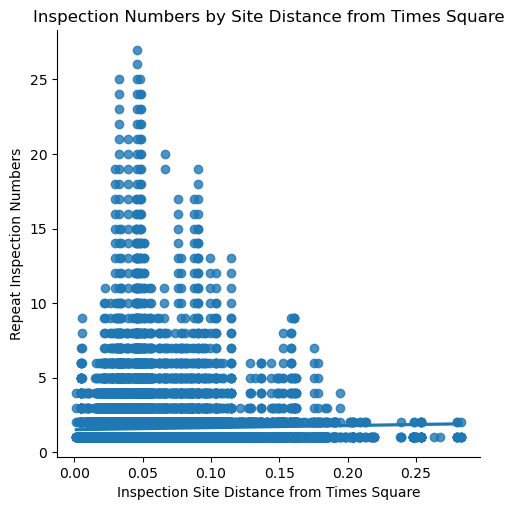

In [150]:
# Create exploratory scatterplot of JOB_PROGRESS and distance_times_square.

times_square_plot = sns.lmplot(x = 'distance_times_square', y = 'JOB_PROGRESS', data = df_merged_1)
plt.title('Inspection Numbers by Site Distance from Times Square')
plot_test.xlabel('Inspection Site Distance from Times Square')
plot_test.ylabel('Repeat Inspection Numbers')
plot_test.show()

In [151]:
# Export scatterplot.

times_square_plot.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'times_square_plot.png'))

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

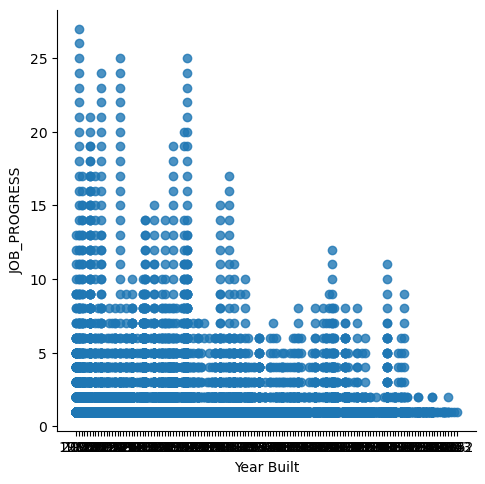

In [141]:
# Create exploratory scatterplot of JOB_PROGRESS and Year Built.

sns.lmplot(x = 'Year Built', y = 'JOB_PROGRESS', data = df_merged_1)

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


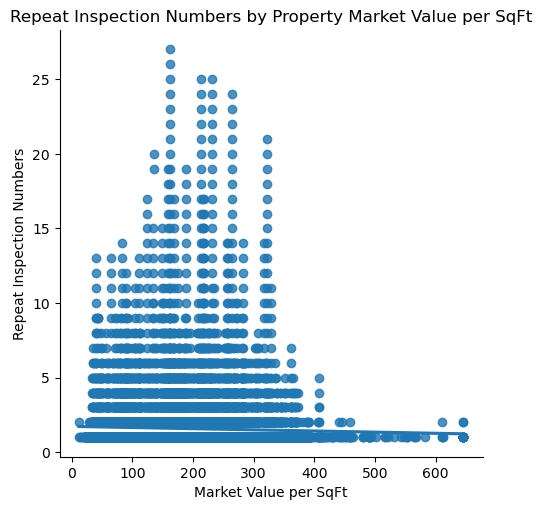

In [145]:
# Create exploratory scatterplot of JOB_PROGRESS and Market Value per SqFt.

market_value_plot = sns.lmplot(x = 'Market Value per SqFt', y = 'JOB_PROGRESS', data = df_merged_1)
plt.title('Repeat Inspection Numbers by Property Market Value per SqFt')
plot_test.xlabel('Market Value per SqFt')
plot_test.ylabel('Repeat Inspection Numbers')
plot_test.show()

In [147]:
# Export scatterplot.

market_value_plot.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'market_value_plot.png'))

Hypothesis: The smaller an inspection location's distance is from Times Square, the more likely it is to have repeat inspections.

### 4. Reshaping the variables into NumPy arrays

In [58]:
# Define X value.

X = df_rats['distance_times_square'].values.reshape(-1, 1)

In [59]:
# Define y value.

y = df_rats['JOB_PROGRESS'].values.reshape(-1, 1)

### 5. Splitting data into training set and test set

In [60]:
# Split data into train set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 6. Linear regression on the data, test set scatterplot, and remarks

In [61]:
# Create linear regression object.

regression = LinearRegression()

In [62]:
# Fit regression to training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Use trained model on X test data to predict y values.

y_predicted = regression.predict(X_test)

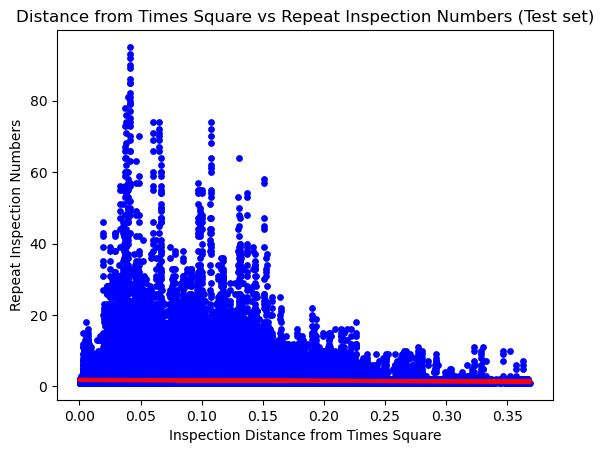

In [64]:
# Create plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from Times Square vs Repeat Inspection Numbers (Test set)')
plot_test.xlabel('Inspection Distance from Times Square')
plot_test.ylabel('Repeat Inspection Numbers')
plot_test.show()

While the regression line doesn't visually appear to fit the data, my experience cleaning and wrangling this data set tells me that the majority of repeat inspection (JOB_PROGRESS) numbers fall between 0 and 10 and JOB_PROGRESS numbers over 40 are outliers, so the regression line seems accurate.

### 7. Checking model performance with summary statistics, y-values comparison, and reflections

In [65]:
# Create objects for model mean squared error and R2 score.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [66]:
# Print model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.24738703]]
Mean squared error:  4.534418625564009
R2 score:  0.0006799114835098763


In [67]:
# Create dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,1.715643
1,2,1.807555
2,1,1.836888
3,8,1.748080
4,1,1.813487
5,2,1.704537
6,1,1.805466
7,1,1.745057
8,1,1.726478
9,1,1.707513


The RMSE for the model's performance was quite large, while the R2 score was quite low (almost zero). The model did not perform very well on the test set. There is a possibility for data bias in that the largest number of inspections occurred in Manhattan where Times Square is located. This could be for any number of outside factors, including proximity to NYC government offices where where inspectors are dispatched.